## ASSIGNMENT 2

## DATA PREPROCESSING

## IMPORT THE NECESSARY LIBRARIES

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## IMPORT THE DATASET 

In [13]:
df=pd.read_csv('Churn_Modelling.csv')

In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## VISUALIZATION

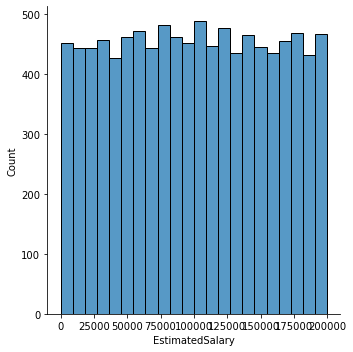

In [15]:
sns.displot(df['EstimatedSalary'])

## univariate analysis

<AxesSubplot:>

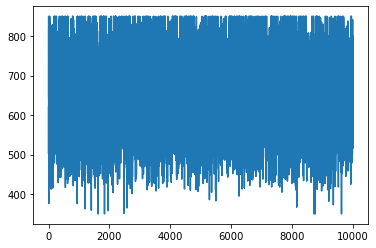

In [16]:
df.CreditScore.plot()

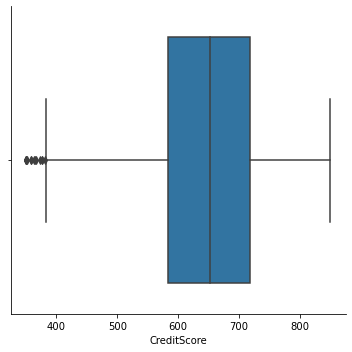

In [17]:
sns.catplot(x='CreditScore',kind='box',data=df)

<AxesSubplot:ylabel='CreditScore'>

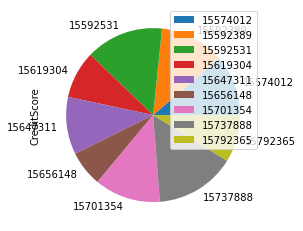

In [18]:
df[1:10].groupby(['CustomerId']).sum().plot(kind='pie',y='CreditScore')

C:\Users\DELL i5-3593\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


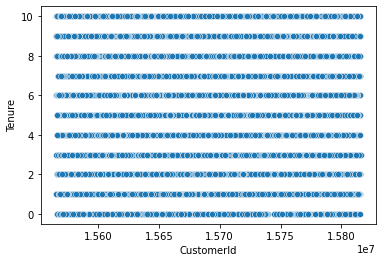

In [19]:
sns.scatterplot(df.CustomerId,df.Tenure)
plt.show()

##multivariate Analysis

<AxesSubplot:>

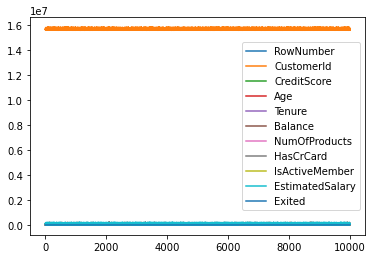

In [20]:
df.plot()

<AxesSubplot:>

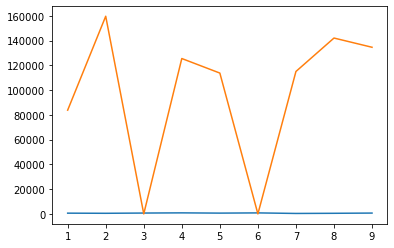

In [21]:
#bivariate analysis
df.CreditScore[1:10].plot()
df.Balance[1:10].plot()

## DESCRIPTIVE ANALYSIS

In [22]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [23]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [24]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## HANDLING VALUES

<AxesSubplot:>

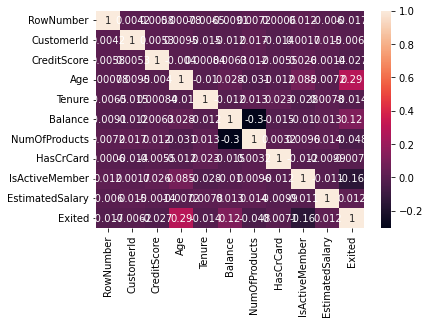

In [25]:
sns.heatmap(df.corr(),annot=True)

## OUTLIERS

C:\Users\DELL i5-3593\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

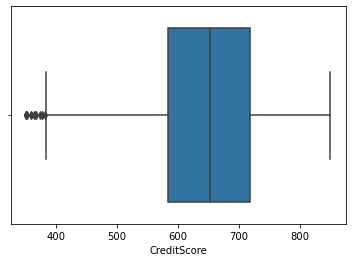

In [26]:
sns.boxplot(df.CreditScore)

In [27]:
Q1=df.CreditScore.quantile(0.25)
Q3=df.CreditScore.quantile(0.75)

In [28]:
IQR=Q3-Q1

In [29]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [30]:
df['CreditScore']=np.where(df['CreditScore']>upper_limit,30,df['CreditScore'])

C:\Users\DELL i5-3593\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

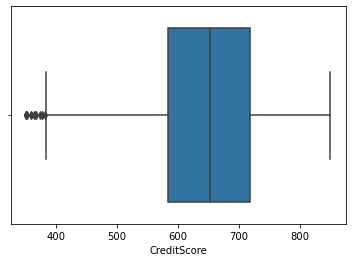

In [31]:
sns.boxplot(df.CreditScore)

## Categorical Columns Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le=LabelEncoder()


In [34]:
df.Gender=le.fit_transform(df.Gender)

In [35]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [38]:
df_main=pd.get_dummies(df,columns=['Geography'])
df_main.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


## SEPARATING INDEPENDENT AND DEPENDENT VARIABLES

In [39]:
X=df_main.drop(columns=['EstimatedSalary'],axis=1)
X.head()
X_scaled=pd.DataFrame(scale(X),columns=X.columns)
X_scaled.head()

NameError: name 'scale' is not defined

In [40]:
y=Df_main.EstimatedSalary
y

NameError: name 'Df_main' is not defined

## SCALING

In [42]:
from sklearn.preprocessing import scale

In [43]:
X_scaled=pd.DataFrame(scale(X),columns=X.columns)
X_scaled.head()

ValueError: could not convert string to float: 'Hargrave'

## TRAIN AND TEST DATA

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X_scaled,y, test_size=0.3,random_state=0)

NameError: name 'X_scaled' is not defined

In [45]:
X_train.shape

NameError: name 'X_train' is not defined

In [46]:
X_test.shape

NameError: name 'X_test' is not defined

In [47]:
y_train.shape

NameError: name 'y_train' is not defined

In [48]:
y.train.shape

NameError: name 'y' is not defined